# Sentiment analysis (September 13th, 2024)

## 1. Downloadthedataset

In [2]:
!gdown -cq 1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy

## 2. Read and Preprocess the dataset

In [1]:
# Load dataset
import pandas as pd

df = pd.read_csv('./IMDB-Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [2]:
# Remove duplicate rows
df = df.drop_duplicates()
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
import contractions
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

stop = set(stopwords.words('english'))

# Expanding contractions


def expand_contractions(text):
    return contractions.fix(text)

# Function to clean data


def preprocess_text(text):
    wl = WordNetLemmatizer()
    soup = BeautifulSoup(text, "html.parser")  # Removing html tags
    text = soup.get_text()
    # Expanding chatwords and contracts clearing contractions
    text = expand_contractions(text)
    # string concatnation using () and adjacent quotes ("a""b")
    emoji_clean = re.compile("["
                             u"\U0001F600-\U0001F64F"  # emoticons
                             u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                             u"\U0001F680-\U0001F6FF"  # transport & map symbols
                             u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                             u"\U00002702-\U000027B0"
                             u"\U000024C2-\U0001F251"
                             "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'', text)
    text = re.sub(r'\.(?=\S)', '. ', text)  # add space after full stop
    text = re.sub(r'http\S+', '', text)  # remove urls
    # remove punctuation and make text lowercase
    text = "".join([word.lower()
                   for word in text if word not in string.punctuation])
    text = " ". join([wl.lemmatize(word) for word in text.split(
    ) if word not in stop and word.isalpha()])  # lemmatize

    return text


df['review'] = df['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\DELL\AppData\Local\Temp\ipykernel_23132\2647746088.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(preprocess_text)


In [4]:
df

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job creative original...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,going disagree previous comment side maltin on...,negative


## 3. Perform EDA on the dataset

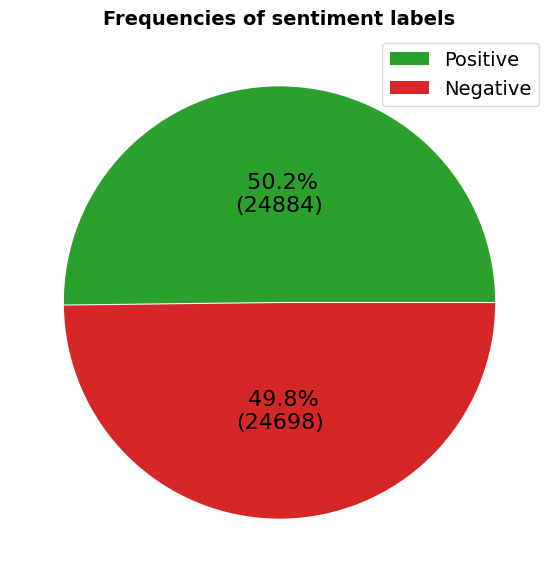

In [7]:
import numpy as np
import seaborn as sns
import matplotlib . pyplot as plt

# Creating autocpt arguments


def func(pct, allvalues):
    absolute = int(pct/100. * np.sum(allvalues))
    return " {:.1f}%\n({:d})".format(pct, absolute)


freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]

labels = ['positive', 'negative']
# Create pie chart
pie, ax = plt.subplots(figsize=[11, 7])
plt.pie(x=data, autopct=lambda pct: func(pct, data),
        explode=[0.0025]*2, pctdistance=0.5,
        # colors=sns.color_palette('pastel')[2:4],
        colors=['tab:green', 'tab:red'],
        textprops={'fontsize': 16})
plt.title('Frequencies of sentiment labels', fontsize=14, fontweight='bold')
labels = ['Positive', 'Negative']
plt.legend(labels, loc="best", prop={'size': 14})
# pie.savefig ("PieChart.png")
plt.show()

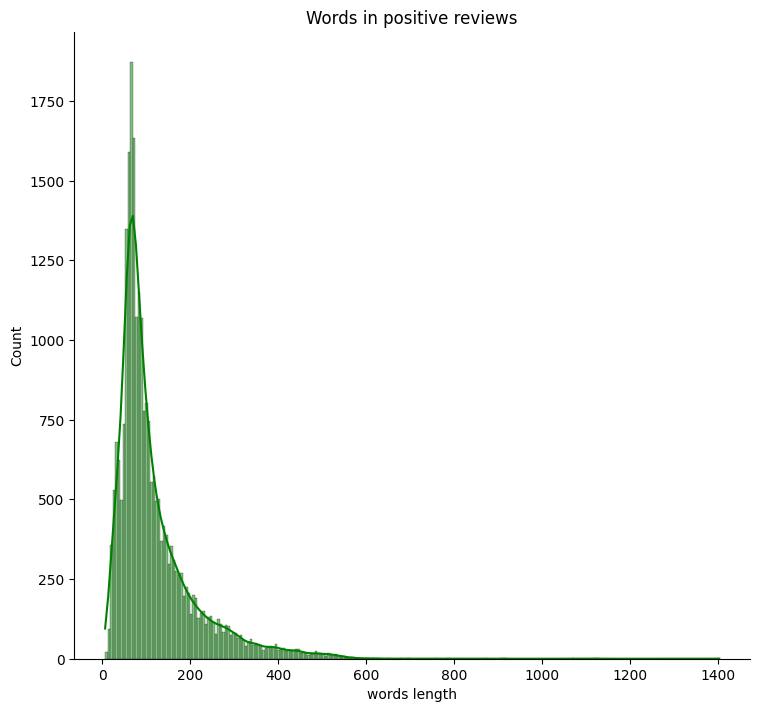

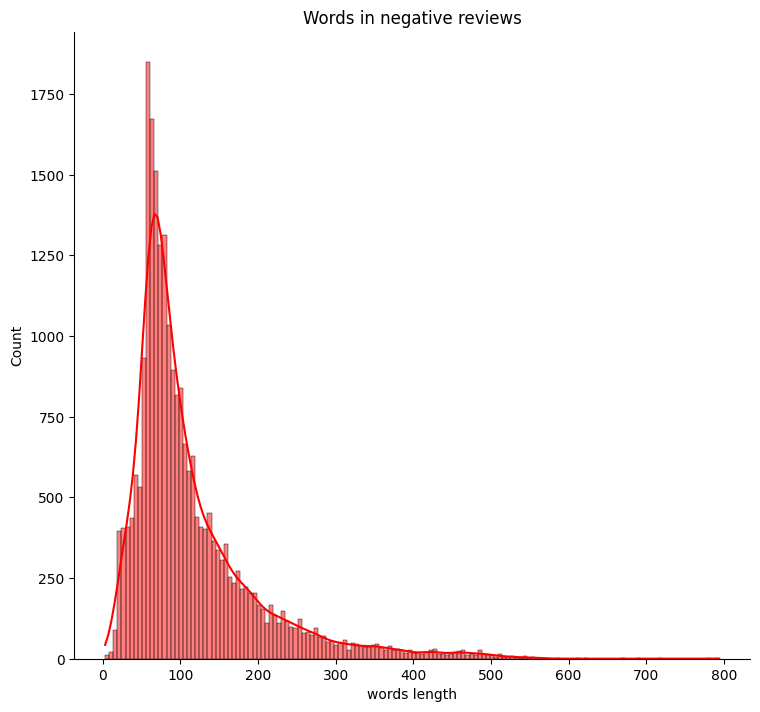

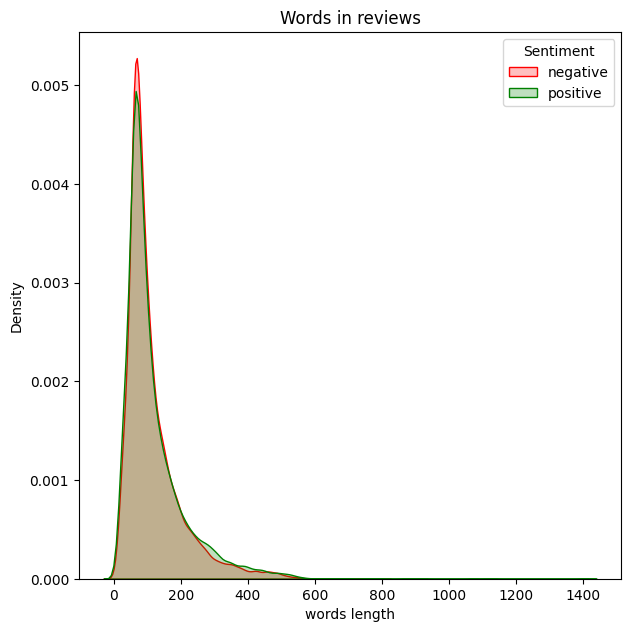

In [8]:
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

hist_positive = sns.displot(data=df_temp[df_temp['sentiment'] == 'positive'],
                            x="words length", hue="sentiment", kde=True,
                            height=7, aspect=1.1, legend=False, palette=['green']).set(title='Words in positive reviews')
plt.show(hist_positive)

hist_negative = sns.displot(data=df_temp[df_temp['sentiment'] == 'negative'],
                            x="words length", hue="sentiment", kde=True,
                            height=7, aspect=1.1, legend=False, palette=['red']).set(title='Words in negative reviews')
plt.show(hist_negative)

plt.figure(figsize=(7, 7.1))
kernel_distibution_number_words_plot = sns.kdeplot(
    data=df_temp, x="words length", hue="sentiment", fill=True, palette=['green', 'red']).set(title='Words in reviews')
plt.legend(title='Sentiment', labels=['negative', 'positive'])
plt.show(kernel_distibution_number_words_plot)

## 4. Split the dataset

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
x_data = df['review']
y_data = label_encode.fit_transform(df['sentiment'])

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42
)

## 5. Vectorize the documents

In [11]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(x_train, y_train)

x_train_encoded = tfidf_vectorizer.transform(x_train)
x_test_encoded = tfidf_vectorizer.transform(x_test)

## 6. Train and Evaluate the model

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
dt_classifier.fit(x_train_encoded, y_train)
y_pred = dt_classifier.predict(x_test_encoded)
accuracy_score(y_pred, y_test)

0.7180598971463145

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_encoded, y_train)
y_pred = rf_classifier.predict(x_test_encoded)
accuracy_score(y_pred, y_test)

0.8420893415347384